In [1]:
import numpy as np
import badlands_companion.eroFunctions as efcts
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Updated stream power model

The **stream power law** (SPL) is expressed as:

$$I = \Psi (PA)^mS^n$$
where $\Psi$ is a bedrock erodibility coefficient and $m$ and $n$ are positive exponents.

It is possible to modify the equation to explicitly incorporate:
+ the effect of local mean annual precipitation rate, $P_i$, and 
+ the effect of bedload sediment supply, $s_{bed}$,
+ where the dependency of bedload transport is related to the upstream slope $S$.

We can express $\Psi$ as a function of:
$$\Psi = K_i \cdot f(P,s_{bed}(S))$$

where $K_i$ is the independent component of erodibility.

## Companion function types

Several functions are provided in the `eroFunctions` class of the Companion to simulate the dependency of the erosion factor to the sediment supply:

- sinsoidal function
- gaussian function and combination of 2 gaussians
- bell function
- trapezoidal function
- triangular function
- sigmoid function


## Precipitation dependency

Following Murphy et al. 2016, the dependence to the precipitation is of the form: 
$$f(P) = P^d$$
For Kohala Peninsula (Hawaii), the authors suggest values for precipitation exponent $d$ between 0.75 and 0.76.

- B. P. Murphy, J. P. Johnson, N. M. Gasparini, L. S. Sklar, _Chemical weathering as a mechanism for the climatic control of bedrock river incision_, **Nature**, 532, pp. 223-227 (2016).


## Bedload vs water flux dependency

Following Sklar & Dietrich (2004), the erosion rate is a function of the ratio between bedload sediment supply and water discharge and could be define to reproduce the tool & cover effect.

- Sklar, L. S., and W. E. Dietrich (2004), _A mechanistic model for river incision into bedrock by saltating bed load_, **Water Resour. Res.**, 40, W06301, doi:10.1029/2003WR002496.

### Declaration of erosion factor sediment supply dependency

In [2]:
sedsup = efcts.eroFunctions(0.,1.,101)
#help(sedsup.gauss2fct)

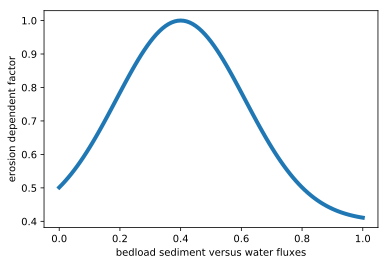

In [3]:
gaussfact = 0.6*sedsup.gauss2fct(0.4,0.3,0.4,0.3)+0.4
plt.plot(sedsup.x, gaussfact, linewidth=4)
plt.xlabel('bedload sediment versus water fluxes')
plt.ylabel('erosion dependent factor')
plt.show()

## Export dataset

We then export the data in a file that will be used in Badlands.

In [4]:
sedsup.exportFunction(gaussfact,'data/sedsupply')

## Bedload vs. slope dependency

Proportion of material entrained as bedload is assumed to be related to the upstream slope.
We consider that only bedload materials will affect the erosion factor. 

As a first approximation we assume a simple dependency between the percentage of eroded material transported  as bedload $P_{bed}$ and the upstream slope $S$.

$$P_{bed} = \Gamma(S) $$



In [5]:
upslp = efcts.eroFunctions(0.,0.02,51)
#help(sedsup.sigfct)

##### Example with a linear function

In [6]:
#linslope = upslp.linfct(0.5,0.2)

In [7]:
#plt.plot(upslp.x, linslope, linewidth=4)
#plt.xlabel('upstream slope [m/m]')
#plt.ylabel('Bedload proportion of eroded sediment [%]')
#plt.show()

##### Example with a gaussian function

In [8]:
gaussslope = 0.3*upslp.gauss2fct(0.015,0.007,0.3,0.01) + 0.1

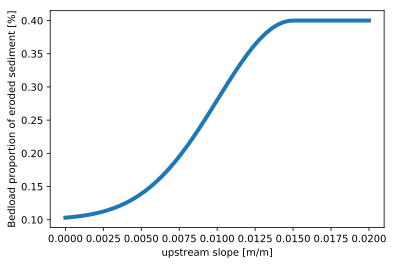

In [9]:
plt.plot(upslp.x, gaussslope, linewidth=4)
plt.xlabel('upstream slope [m/m]')
plt.ylabel('Bedload proportion of eroded sediment [%]')
plt.show()

## Export dataset

We then export the data in a file that will be used in Badlands.

In [10]:
upslp.exportFunction(gaussslope,'data/bedslp')